<a href="https://colab.research.google.com/github/erlonL/testes-inferencia/blob/main/Zscore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

X: média amostral

n: número de valores da amostra

alpha: nivel de significância

sigma: desvio padrão

mu: média populacional

H0: a amostra provém de uma população com determinada média (mu = mu0)

H1: contesta a hipótese nula (mu != mu0)

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import random

## Teste Z de Hipótese p/ Média Populacional Unilateral

In [33]:
X = 10
n = 100
alpha = 0.05
mu0 = 5
sigma = 2
amostra = np.random.normal(loc=mu0, scale=sigma, size=n)

In [34]:
np.mean(amostra)

4.9465527293998255

In [35]:
Z = (X - mu0) / (sigma/(n)**(1/2))
print(Z)

25.0


In [36]:
ppf = stats.norm.ppf(alpha)
ppf

-1.6448536269514729

In [37]:
if Z < ppf:
    print("Com 95% de confiança, temos provas para rejeitar H0.")
else:
    print("Com 95% de confiança, não temos provas para rejeitar H0")

Com 95% de confiança, não temos provas para rejeitar H0


(array([ 1.,  3.,  5., 18., 22., 29., 15.,  3.,  2.,  2.]),
 array([-1.20452546,  0.0393204 ,  1.28316626,  2.52701213,  3.77085799,
         5.01470385,  6.25854971,  7.50239558,  8.74624144,  9.9900873 ,
        11.23393317]),
 <BarContainer object of 10 artists>)

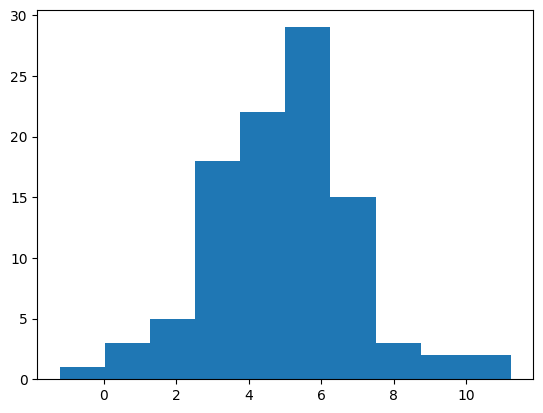

In [38]:
plt.hist(amostra)

## Teste Z de Hipótese p/ Média Populacional Bilateral

In [40]:
ppf = stats.norm.ppf(alpha/2)
ppf

-1.9599639845400545

In [41]:
if Z < ppf or Z > -ppf:
    print("Com 95% de confiança, temos provas para rejeitar H0.")
else:
    print("Com 95% de confiança, não temos provas para rejeitar H0")

Com 95% de confiança, temos provas para rejeitar H0.


## Teste t-student de Hipótese p/ Média (sigma desconhecido)

In [42]:
# exemplo

mu0 = 18
n = 25
X = 16.808
S = 2.733
alpha = '0.010'

In [43]:
Tcalc = (X - mu0) / (S / (n)**(1/2) )
print(Tcalc)

-2.1807537504573733


In [44]:
import pandas as pd
from scipy.stats import t as t_student

tabela_t_student = pd.DataFrame(
    [],
    index=[i for i in range(1, 31)],
    columns = [i / 100 for i in range(10, 0, -1)]
)

for index in tabela_t_student.index:
    for column in tabela_t_student.columns:
        tabela_t_student.loc[index, column] = t_student.ppf(1 - float(column) / 2, index)

index=[('Graus de Liberdade (n - 1)', i) for i in range(1, 31)]
tabela_t_student.index = pd.MultiIndex.from_tuples(index)

columns = [("{0:0.3f}".format(i / 100), "{0:0.3f}".format((i / 100) / 2)) for i in range(10, 0, -1)]
tabela_t_student.columns = pd.MultiIndex.from_tuples(columns)

tabela_t_student.rename_axis(['Unicaudal', 'Bicaudal'], axis=1, inplace = True)

In [46]:
Tc = tabela_t_student[alpha].iloc[(n-1)-1][0]
Tc

2.796939504772804

In [ ]:
# Teste Unicaudal à esquerda
if Tcalc < Tc:
    print("Não temos evidências para rejeitar H0")
else:
    print("temos evidências para rejeitar H0")

Não temos evidências para rejeitar H0


In [48]:
# Teste Bicaudal
if Tcalc > -Tc or Tcalc < Tc:
    print("Não temos evidências para rejeitar H0")
else:
    print("Temos evidências para rejeitar H0")

temos evidências para rejeitar H0
